In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog
from oclog.openset.opensetv12 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 
# tf.random.set_seed(1234)
# np.random.seed(1234) 

In [2]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=False,
                                                          designated_ukc_cls=5)

extracting all the values from your input parameter
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, class 5 is added as ukc
ukc_5:, 150
length of train_data - (num_seq_per_cls * num_class)// batch size: 112
get_bgdata  num_classses: 3 and self.num_classes: 3


extracting all the values from your input parameter
got all the dataset
extracting all the values from your input parameter
vocab_size: 50
2022-05-11 09:29:45.267443
starting to create ptmodel automatically
epoch: 1/5, train_loss: 3.846605062484741, train_acc: 52.26, F1_train: 0.4253 val_loss: 3.846605062484741, val_acc: 59.38,, F1_val: 0.4985
epoch: 2/5, train_loss: 2.8630712032318115, train_acc: 50.95, F1_train: 0.4073 val_loss: 2.8630712032318115, val_acc: 61.61,, F1_val: 0.5088
epoch: 3/5, train_loss: 2.4504919052124023, train_acc: 62.28, F1_train: 0.6216 val_loss: 2.4504919052124023, val_acc: 91.29,, F1_val: 0.9095
epoch: 4/5, train_loss: 2.0752928256988525, train_acc: 56.67, F1_train: 0.5141 val_loss: 2.0752928256988525, val_acc: 63.84,, F1_val: 0.5386
train score not improving  going to wait state 1
val score not improving  going to wait state 1
epoch: 5/5, train_loss: 1.730332851409912, train_acc: 87.5, F1_train: 0.8739 val_loss: 1.730332851409912, val_acc: 99.55,, F1_val: 0.99

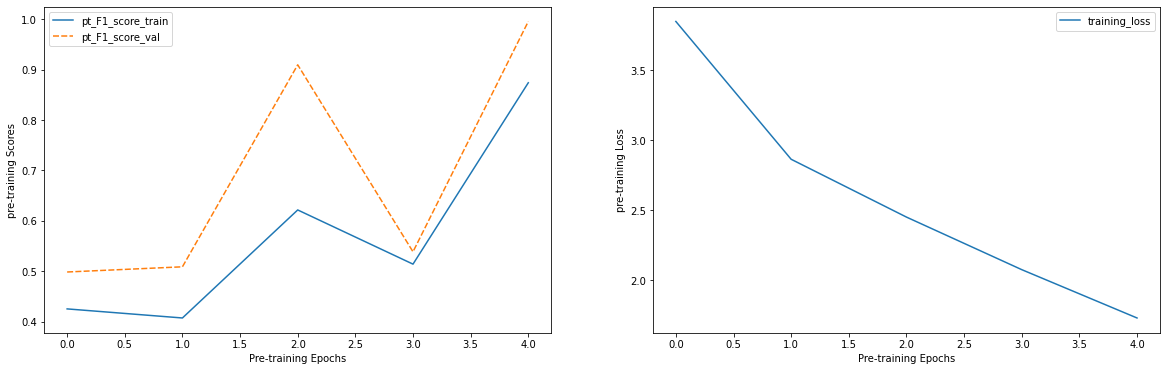

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


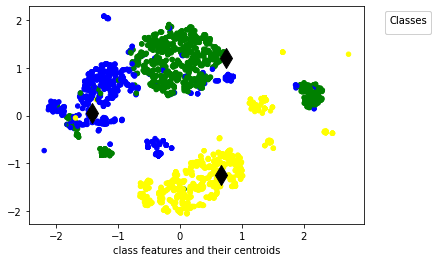

run_id:  2022-05-11_09_30_59.989047_f7c5ba28d0de11ecb136ac8247733f47
unknown optimizer None. assigning default as adam with lr_rate=0.35


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.43it/s]


epoch: 1/5, train_loss: 0.27499455213546753, F1_train: 0.8778612618985827 F1_val: 0.9767662004011333


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.42it/s]


epoch: 2/5, train_loss: 0.27520835399627686, F1_train: 0.8869117304031554 F1_val: 0.9850921724591524


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.32it/s]


epoch: 3/5, train_loss: 0.27517107129096985, F1_train: 0.8921543469134814 F1_val: 0.992115948806385


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.41it/s]


epoch: 4/5, train_loss: 0.27519580721855164, F1_train: 0.0 F1_val: 0.0
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.44it/s]


epoch: 5/5, train_loss: 0.2749934792518616, F1_train: 0.6238065213475049 F1_val: 0.6606762709763897
train score not improving  going to wait state 2
val score not improving  going to wait state 2


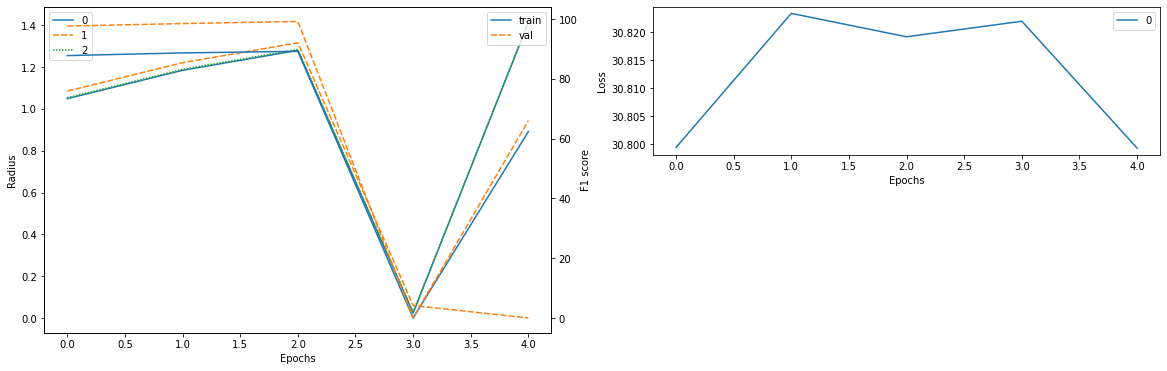

classification report for training:
[[1139   11    1   44]
 [ 235  820    0  140]
 [   5    2 1159   28]
 [   0    0    0    0]]
87.0
f1_weighted: 0.8927707779716789, f1_macro: 0.6695973169733055, f1_micro: 0.8699776785714287, f_measure: {'Known': 89.2796, 'Open': 0, 'F1-score': 66.9597}
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1195
           1       0.98      0.69      0.81      1195
           2       1.00      0.97      0.98      1194
           5       0.00      0.00      0.00         0

    accuracy                           0.87      3584
   macro avg       0.70      0.65      0.67      3584
weighted avg       0.94      0.87      0.89      3584

classification report for test data:
[[140   2   0   0]
 [  0 147   0   0]
 [  0   0 121  23]
 [ 41  12  12  78]]
84.38
f1_weighted: 0.8344538901218772, f1_macro: 0.8336022478105745, f1_micro: 0.84375, f_measure: {'Known': 89.8355, 'Open': 63.9344, 'F1-score': 83.3602}
      

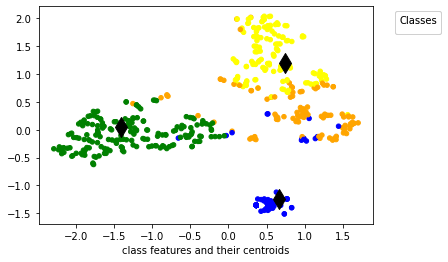

In [3]:


# res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
#                  test_data=test_data, bglog=bglog, 
#                  manual_color_map=True, centroid_black=True,                               
#                  tsne_n_iter=2000, tsne_perplexity=8,
#                  embedding_size=12, oc_lr=2.5, pt_epochs=5, oc_epochs=2,
#                 save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
#                                halpha=0.7, hbeta=1.5, batch_normalize=True )


res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=0.35, pt_epochs=5, oc_epochs=5, oc_wait=5, 
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=True,
                               halpha=0.7, hbeta=1.2, batch_normalize=True, ptmodel_vhm=True )

In [4]:
# res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
#                  test_data=test_data, bglog=bglog, 
#                  manual_color_map=True, centroid_black=True,                               
#                  tsne_n_iter=2000, tsne_perplexity=8,
#                  embedding_size=12, oc_lr=2.5, pt_epochs=5, oc_epochs=2,
#                 save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
#                                halpha=0.7, hbeta=1.5, batch_normalize=True )